In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data

In [3]:
df = pd.read_csv('diamonds_hw.csv')

In [4]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53815 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


Kolom-kolom dari dataset 'diamonds.csv' memiliki definisi sebagai berikut:
- price: price in US dollars ($326--$18,823)
- carat: weight of the diamond (0.2--5.01)
- cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color: diamond colour, from J (worst) to D (best)
- clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- x: length in mm 
- y: width in mm 
- z: depth in mm 
- depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) 
- table: width of top of diamond relative to widest point


### Soal:

1. Terdapat beberapa kolom yang mengalami missing value. Tentukan metode terbaik untuk mengisi missing value pada kolom tersebut. Terapkan metode tersebut, dan berikan argumen Anda! (Tuliskan, "saya memilih metode __ untuk mengisi missing value pada kolom __ karena ___). 

2. Berdasarkan informasi terkait kolom `clarity`, lakukanlah encoding yang sesuai (ubahlah kolom `clarity` dari kategorikal menjadi numerik). 

2. Buatlah visualisasi boxplot & histplot untuk memeriksa distribusi pada kolom-kolom 'x', 'y', dan 'z'. Apakah ada data-data yang outlier? Jika ya, apa saja outlier yang muncul? Berapa banyak baris yang mengalami outlier?

#### Nomor 1:

In [6]:
berlian = df.copy()

In [7]:
berlian = berlian [~berlian["carat"].isnull()].reset_index(drop=True)

In [8]:
berlian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53815 entries, 0 to 53814
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53815 non-null  float64
 1   cut      53815 non-null  object 
 2   color    53815 non-null  object 
 3   clarity  53815 non-null  object 
 4   depth    53815 non-null  float64
 5   table    53815 non-null  float64
 6   price    53815 non-null  int64  
 7   x        53815 non-null  float64
 8   y        53815 non-null  float64
 9   z        53815 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


Saya memilih metode drop untuk missing value pada seluruh kolom selain carat karena perbedaan hanya 134 data dari 53940 atau 3% dari total keseluruhan baris

#### Nomor 2:

In [10]:
berlian["clarity"].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [11]:
berlian= berlian.join(pd.get_dummies(berlian["clarity"],prefix='clarity'))

In [12]:
berlian['clarity'] = [0 if x == "SI2" else(1 if x == "SI1" else(2 if x == "VS1" else(3 if x =="VS2" else(4 if x == "VVS2" else(5 if x == "VVS1" else(6 if x =="I1" else(7))))))) for x in berlian ['clarity']]

In [13]:
berlian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53815 entries, 0 to 53814
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carat         53815 non-null  float64
 1   cut           53815 non-null  object 
 2   color         53815 non-null  object 
 3   clarity       53815 non-null  int64  
 4   depth         53815 non-null  float64
 5   table         53815 non-null  float64
 6   price         53815 non-null  int64  
 7   x             53815 non-null  float64
 8   y             53815 non-null  float64
 9   z             53815 non-null  float64
 10  clarity_I1    53815 non-null  uint8  
 11  clarity_IF    53815 non-null  uint8  
 12  clarity_SI1   53815 non-null  uint8  
 13  clarity_SI2   53815 non-null  uint8  
 14  clarity_VS1   53815 non-null  uint8  
 15  clarity_VS2   53815 non-null  uint8  
 16  clarity_VVS1  53815 non-null  uint8  
 17  clarity_VVS2  53815 non-null  uint8  
dtypes: float64(6), int64(2), o

#### Nomor 3:

<AxesSubplot:xlabel='x', ylabel='Count'>

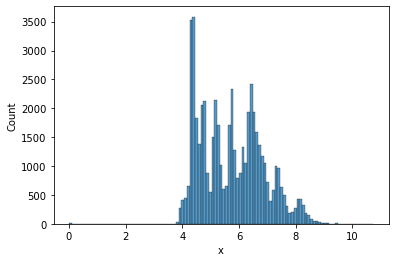

In [14]:
sns.histplot(data = berlian, x = 'x')

<AxesSubplot:xlabel='y', ylabel='Count'>

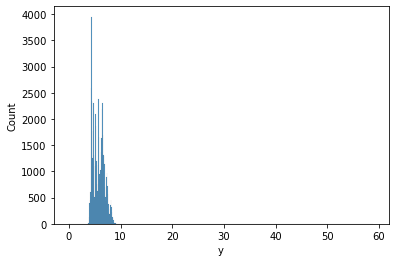

In [15]:
sns.histplot(data = berlian, x = 'y')

<AxesSubplot:xlabel='z', ylabel='Count'>

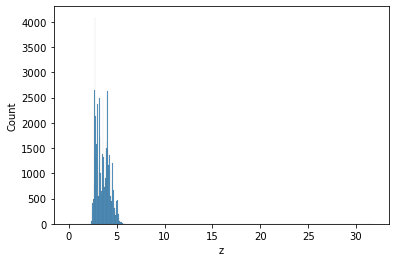

In [16]:
sns.histplot(data = berlian, x = 'z')

Distribusi pada data berlian tidak terdistribusi dengan normal

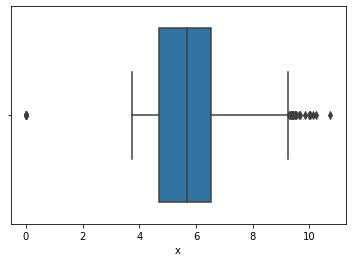

In [17]:
sns.boxplot(x=berlian["x"]);

<AxesSubplot:xlabel='y'>

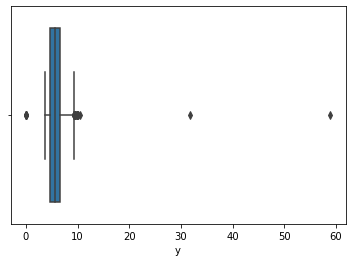

In [18]:
sns.boxplot(x=berlian["y"])

<AxesSubplot:xlabel='z'>

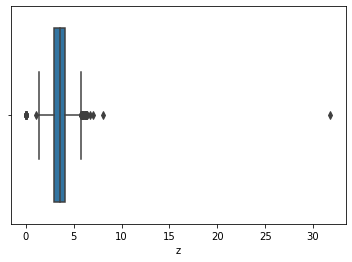

In [19]:
sns.boxplot(x=berlian["z"])

In [20]:
def cek_outlier(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    jga = q3-q1
    return ["outlier" if (x<q1-1.5*jga or x>q3+1.5*jga) else 'not_outlier' for x in data[column].values]

In [21]:
berlian["outlier_x"] = cek_outlier(data=berlian, column="x");
berlian["outlier_y"] = cek_outlier(data=berlian, column="y");
berlian["outlier_z"] = cek_outlier(data=berlian, column="z");

In [22]:
outlier_x_df = berlian[berlian["outlier_x"]=="outlier"];
outlier_x_df.count()

carat           32
cut             32
color           32
clarity         32
depth           32
table           32
price           32
x               32
y               32
z               32
clarity_I1      32
clarity_IF      32
clarity_SI1     32
clarity_SI2     32
clarity_VS1     32
clarity_VS2     32
clarity_VVS1    32
clarity_VVS2    32
outlier_x       32
outlier_y       32
outlier_z       32
dtype: int64

In [25]:
outlier_y_df = berlian[berlian["outlier_y"]=="outlier"]
outlier_y_df.count()

carat           29
cut             29
color           29
clarity         29
depth           29
table           29
price           29
x               29
y               29
z               29
clarity_I1      29
clarity_IF      29
clarity_SI1     29
clarity_SI2     29
clarity_VS1     29
clarity_VS2     29
clarity_VVS1    29
clarity_VVS2    29
outlier_x       29
outlier_y       29
outlier_z       29
dtype: int64

In [26]:
outlier_z_df = berlian[berlian["outlier_z"]=="outlier"]
outlier_z_df.count()

carat           49
cut             49
color           49
clarity         49
depth           49
table           49
price           49
x               49
y               49
z               49
clarity_I1      49
clarity_IF      49
clarity_SI1     49
clarity_SI2     49
clarity_VS1     49
clarity_VS2     49
clarity_VVS1    49
clarity_VVS2    49
outlier_x       49
outlier_y       49
outlier_z       49
dtype: int64

In [ ]:
Dengan menggunakan boxplot terdapat 32 outlier pada x, 29 pada y, dan 49 pada z